In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Question 1
# Dùng Pandas đọc và tổng hợp dữ liệu các năm

In [2]:
df = []
for year in range(1880,2019):
    filename = 'yob' + str(year) + '.txt'
    df_tmp = pd.read_csv(filename, sep=',', header=None, names=['name','sex','occurrences'])
    
    # append this data with year for later queries
    df_tmp['year'] = str(year)
    df.append(df_tmp)
    
df = pd.concat(df, axis=0)
df.drop_duplicates(inplace=True)

# show some roes
df.head()

,name,sex,occurrences,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


# Question 2
# Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm

In [3]:
# Prepare necessary data for plotting
df_sex_year = df.groupby(['sex','year'])['occurrences'].sum().reset_index()
df_sex_year.columns = ['sex','year','total_births']

# show some rows
df_sex_year.head()

,sex,year,total_births
0,F,1880,90994
1,F,1881,91953
2,F,1882,107847
3,F,1883,112319
4,F,1884,129019


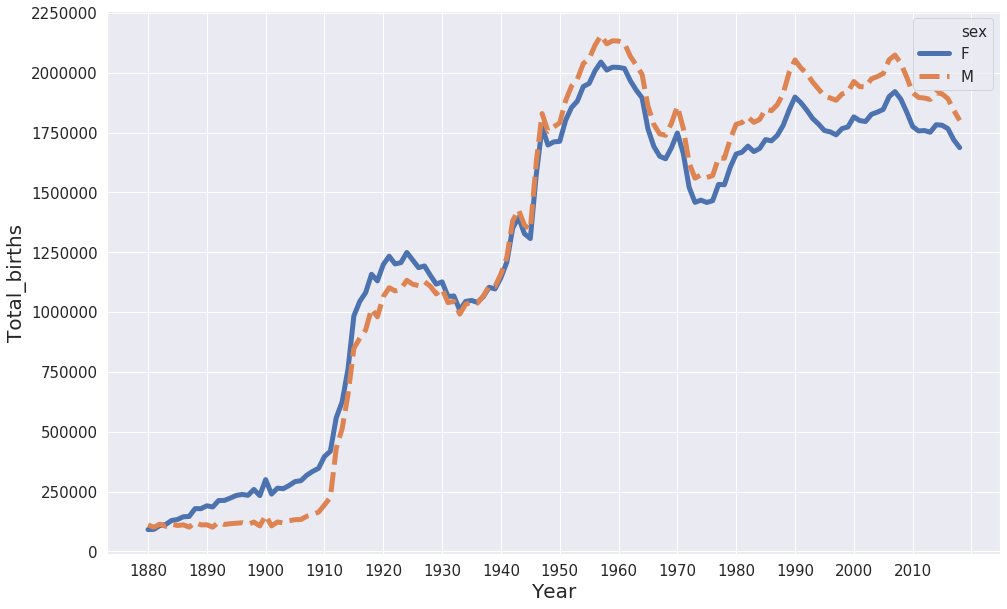

In [4]:
# plot the figure
plt.figure(figsize = (16,10))
sns.set(style = 'darkgrid')

sns.set(rc={"lines.linewidth": 5})
ax = sns.lineplot(x = 'year', y = 'total_births', data = df_sex_year, style = "sex", hue = "sex")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(250000))

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total_births', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Question 3
## Tạo subset gồm 1000 tên phổ biến mỗi năm theo từng loại giới tính

In [5]:
# Notice that, there are several names having the same number of occurrences thus we consider them having the same popularity.
# In these cases, we use rank(method='first') to rank rows in higher rank when they appear sooner in the original data.
# This ensure for each group of ('sex','year'), we get only 1000 unique top names
df['rank'] = df.groupby(['sex','year'])['occurrences'].rank(method='first', ascending=False)

# top 1000 popular names for each group of ('sex','year') are rows having rank from 1 to 1000 
# we truncate top rank 1000 unique names for each group only 
df_top_1000 = df[df['rank'] <= 1000]

# show results
df_top_1000.head()

,name,sex,occurrences,year,rank
0,Mary,F,7065,1880,1.0
1,Anna,F,2604,1880,2.0
2,Emma,F,2003,1880,3.0
3,Elizabeth,F,1939,1880,4.0
4,Minnie,F,1746,1880,5.0


# Question 4
## Vẽ biểu đồ số lượng các bé sinh theo năm có tên: Philip, Harry, Elizabeth, Marilyn

In [6]:
# Prepare data for plotting
df_tmp = df[df['name'].isin(('Philip','Harry','Elizabeth','Marilyn'))]

# Our data is still differentiated between male and female for each name
# We need to aggregate rows with male and female within the same group of ('name','year')
df_tmp = df_tmp.groupby(['name','year'])['occurrences'].sum().reset_index()

# show results
df_tmp.head()

,name,year,occurrences
0,Elizabeth,1880,1948
1,Elizabeth,1881,1852
2,Elizabeth,1882,2193
3,Elizabeth,1883,2268
4,Elizabeth,1884,2565


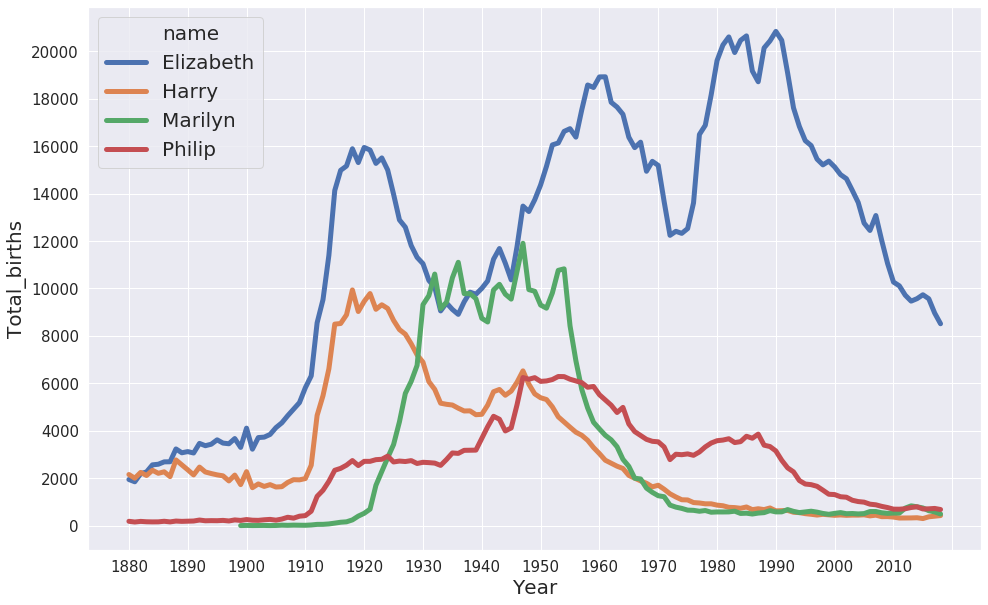

In [7]:
plt.figure(figsize = (16,10))
sns.set(style = 'darkgrid')

sns.set(rc={"lines.linewidth": 5})
ax = sns.lineplot(x = 'year', y = 'occurrences', data = df_tmp, hue = "name")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total_births', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 20)

plt.show()

# Question 5
## Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [8]:
# prepare data
# We first calculate total_births for top_1000 popular names for each group of ('year','sex').
df_group_top_1000 = df_top_1000.groupby(['sex','year'])['occurrences'].sum().reset_index()

# Now calculate total_births for all names for each group of ('year','sex')
df_group_all = df.groupby(['sex','year'])['occurrences'].sum().reset_index()

# We notice that df_group_top_1000 and df_group_all have columns sorted in the same manner.
# Thus we can simply concat these two dataframes instead of using merge command to combine two dataframes.
# To avoid duplicate column name (both df_group_top_1000 and df_group_all have two identical column 'sex' and 'year').
# We drop column 'sex' and 'year' in df_group_all first
df_group_all = df_group_all.drop(columns = ['sex','year'])

# rename columns 'occurrences' in df_group_all as 'total'
df_group_all.columns = ['total']

# then concat df_group_top_1000 and df_group_all
df_aggregate = pd.concat([df_group_top_1000,df_group_all],axis=1)

# create additional column showing percentage of occurrences of top_1000 over total occurences
df_aggregate['percentage_top_1000'] = df_aggregate['occurrences']/df_aggregate['total']*100

# project the neccessary columns only
df_aggregate = df_aggregate[['sex','year','percentage_top_1000']]

# show results
df_aggregate.head()

,sex,year,percentage_top_1000
0,F,1880,100.000000
1,F,1881,100.000000
2,F,1882,99.870186
3,F,1883,99.759613
4,F,1884,99.315605


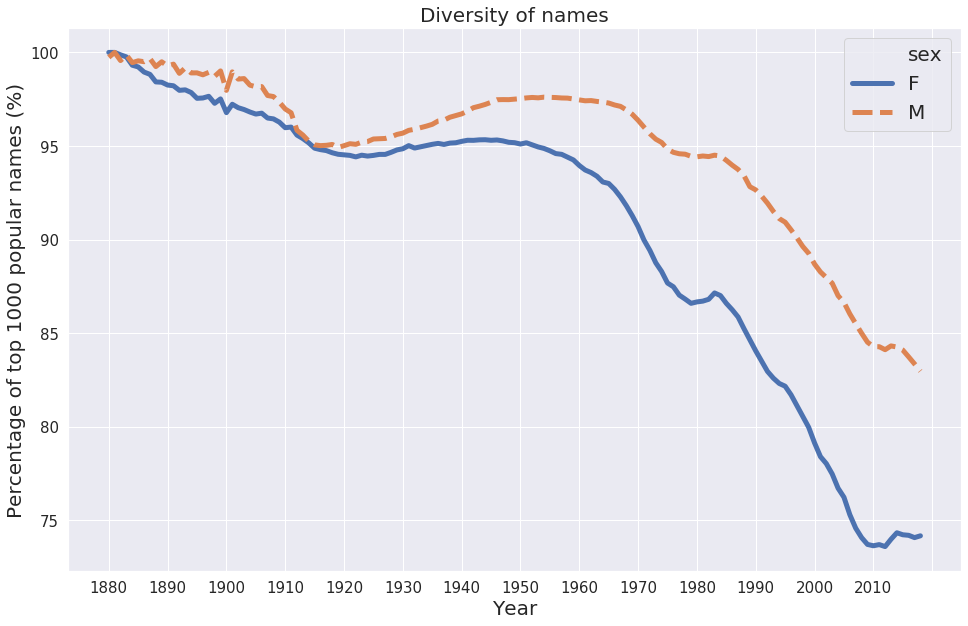

In [9]:
# plot the figure
plt.figure(figsize = (16,10))
sns.set(style='darkgrid')

sns.set(rc={"lines.linewidth": 5})
ax = sns.lineplot(x='year', y='percentage_top_1000', data = df_aggregate, hue = "sex", style = "sex")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))

plt.xlabel('Year',fontsize=20)
plt.ylabel('Percentage of top 1000 popular names (%)',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=20)
plt.title('Diversity of names', fontsize=20)

plt.show()

# Question 6
## Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [10]:
## Here, we do not compare absolute value of total_births for each group of ('sex','year') since year by year,
## the number of babies is increasing. Therefore, we choose to compare the percentage value.
## Specifically, for each group of ('sex','year')  we calculate percentage of occurrences for each different
## initial_letter.

# get data from year 1900, 1960, 2018
df_filtered = df[df['year'].isin(('1900','1960','2018'))]

# get the initial letter of df_filtered['name']
df_filtered['initial_letter'] = df_filtered['name'].apply(lambda x: x[0])

# get necessary columns only
df_filtered = df_filtered[['year','sex','initial_letter','occurrences']]

# get total_occurrences for each group of ('sex','year','initial_letter')
df_tmp = df_filtered.groupby(['sex','year','initial_letter'])['occurrences'].sum().reset_index()

/opt/uw/anaconda/3.2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
# data is not ready to use,  there are cases that no occurrences with some initial_letter
# we create pseudo data for later merging with df_tmp
df_letter = pd.DataFrame(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
df_letter.columns = ['initial_letter']
df_letter['key'] = 1

df_sex = pd.DataFrame(['F','M'])
df_sex.columns = ['sex']
df_sex['key'] = 1

df_year = pd.DataFrame(['1900','1960','2018'])
df_year.columns = ['year']
df_year['key'] = 1

df_sex_letter = df_letter.merge(df_sex, on = 'key')
df_sex_letter_year = df_sex_letter.merge(df_year, on = 'key')[['initial_letter','sex','year']]

df_sex_letter_year

,initial_letter,sex,year
0,A,F,1900
1,A,F,1960
2,A,F,2018
3,A,M,1900
4,A,M,1960
...,...,...,...
151,Z,F,1960
152,Z,F,2018
153,Z,M,1900
154,Z,M,1960


In [12]:
# Get total_births (occurrences) for each group of ('sex','year')
df_final = df_sex_letter_year.merge(df_tmp, on = ['initial_letter','sex','year'], how = 'left')

df_final = df_final[['initial_letter','sex','year','occurrences']]

# df_tmp = df_final.groupby(['initial_letter','sex','year'])
df_sex_year = df_final.groupby(['sex','year'])['occurrences'].sum().reset_index()

# show df_sex_year
df_sex_year

,sex,year,occurrences
0,F,1900,299798.0
1,F,1960,2022010.0
2,F,2018,1686961.0
3,M,1900,150480.0
4,M,1960,2132155.0
5,M,2018,1800392.0


In [13]:
# we are now interested in percentage change of initial_letter change for sex through year 1900, 1960, and 2018
df_final = df_final.merge(df_sex_year, on = ['sex','year'], how = 'left')

df_final['letter_percentage'] = df_final['occurrences_x']*100/df_final['occurrences_y']

df_final = df_final[['initial_letter','sex','year','letter_percentage']]

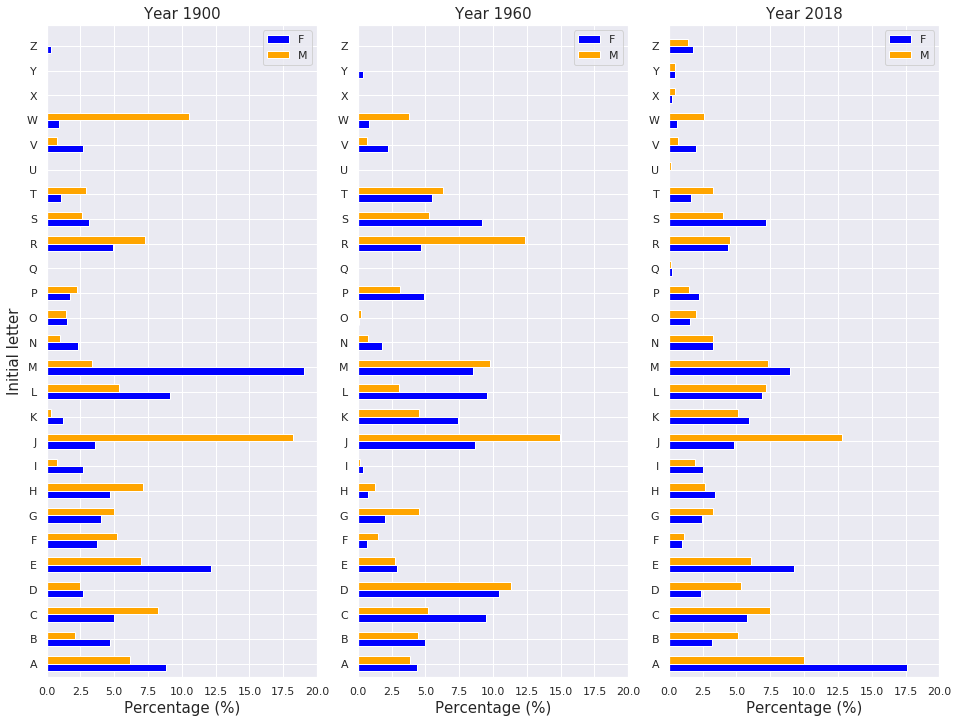

In [14]:
# plot figures
bars1 = df_final[(df_final['sex'] == 'F') & (df_final['year'] == '1900')]['letter_percentage']
 
bars2 = df_final[(df_final['sex'] == 'M') & (df_final['year'] == '1900')]['letter_percentage']

bars3 = df_final[(df_final['sex'] == 'F') & (df_final['year'] == '1960')]['letter_percentage']
 
bars4 = df_final[(df_final['sex'] == 'M') & (df_final['year'] == '1960')]['letter_percentage']

bars5 = df_final[(df_final['sex'] == 'F') & (df_final['year'] == '2018')]['letter_percentage']
 
bars6 = df_final[(df_final['sex'] == 'M') & (df_final['year'] == '2018')]['letter_percentage']

ind = np.arange(len(bars1))
width = 0.3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,12), 
                        gridspec_kw={'hspace': 0, 'wspace': 0.15})


ax1.barh(ind, bars1, width, color='blue', label='F')
ax1.barh(ind + width, bars2, width, color='orange', label='M')

ax1.set(yticks=ind + width/2, yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), ylim=[2*width - 1, len(bars1)])
ax1.legend()
ax1.set_ylabel('Initial letter', fontsize=15)
ax1.set_xlabel('Percentage (%)', fontsize=15)
ax1.set_xlim(0,20)
ax1.set_title('Year 1900',fontsize=15)

ax2.barh(ind, bars3, width, color='blue', label='F')
ax2.barh(ind + width, bars4, width, color='orange', label='M')

ax2.set(yticks=ind + width/2, yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), ylim=[2*width - 1, len(bars1)])
ax2.legend()
# ax2.set_ylabel('Initial letter')
ax2.set_xlabel('Percentage (%)', fontsize=15)
ax2.set_title('Year 1960', fontsize=15)
ax2.set_xlim(0,20)

ax3.barh(ind, bars5, width, color='blue', label='F')
ax3.barh(ind + width, bars6, width, color='orange', label='M')

ax3.set(yticks=ind + width/2, yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), ylim=[2*width - 1, len(bars1)])
ax3.legend()
# ax2.set_ylabel('Initial letter')
ax3.set_xlabel('Percentage (%)', fontsize=15)
ax3.set_title('Year 2018', fontsize=15)
ax3.set_xlim(0,20)
plt.show()

# Question 7
## Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl...” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [15]:
# we filter the name that appear in all years first
df_name_year = df[['name','year']]
df_name_year.drop_duplicates(inplace=True)
df_tmp = df_name_year.groupby(['name'])['year'].count().reset_index()
df_tmp.columns = ['name','num_year_appear']
df_tmp.sort_values(by = ['num_year_appear'], ascending=False)

# get names that appear in all years only
df_tmp = df_tmp[df_tmp['num_year_appear'] == 2019-1880]

# join back to the original data
df_tmp = df_tmp.merge(df, how = 'left', on = 'name')

df_tmp = df_tmp[['name','sex','occurrences','year']]

/opt/uw/anaconda/3.2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# for each name, each year, we calculate the ratio as (num_males - num_females)/(max(num_males,num_females)) to measure the mismatch between male and female
# If this ratio is small, female is dominated with that name, otherwise male is dominated

df_tmp_male = df_tmp[df_tmp['sex'] == 'M']
df_tmp_female = df_tmp[df_tmp['sex'] == 'F']

df_tmp_joined = df_tmp_male.merge(df_tmp_female, how = 'outer', on = ['name','year'])

# replace null value with the appropriate value
df_tmp_joined['sex_x'] = 'M'
df_tmp_joined['sex_y'] = 'F'
df_tmp_joined['occurrences_x'] = df_tmp_joined['occurrences_x'].apply(lambda x: x if ~np.isnan(x) else 0)
df_tmp_joined['occurrences_y'] = df_tmp_joined['occurrences_y'].apply(lambda x: x if ~np.isnan(x) else 0)

# create additional column to measure the mismatch ratio
df_tmp_joined['diff'] = (df_tmp_joined['occurrences_x'] - df_tmp_joined['occurrences_y'])/df_tmp_joined[['occurrences_x','occurrences_y']].max(axis=1)

In [17]:
# to check which names are dominated by male (female) from beginning then dominated by female (male).
# We roughly divide data into two time range. Part I is data from 1880 to 1950, part II is data from 1951 to 2018
# For each part, for each name, we measure the median of mismatch ratio to represent how male (female) is dominated.
# If a specific name is dominated by male in the first part, and then dominated by female in the second part then we choose that name. Similarly for female case
df_tmp_joined['flag'] = df_tmp_joined['year'].apply(lambda x: 0 if x <= '1950' else 1)

df_aggregate = df_tmp_joined.groupby(['name','flag'])['diff'].median().reset_index()

# filter part 1
df_aggregate_part1 = df_aggregate[df_aggregate['flag'] == 0]

# filter part 2
df_aggregate_part2 = df_aggregate[df_aggregate['flag'] == 1]

df_aggregate = df_aggregate_part1.merge(df_aggregate_part2, on = 'name')

df_aggregate.head()

,name,flag_x,diff_x,flag_y,diff_y
0,Aaron,0,1.000000,1,0.993058
1,Abbie,0,-0.963235,1,-1.000000
2,Abe,0,1.000000,1,1.000000
3,Abel,0,1.000000,1,1.000000
4,Abigail,0,-1.000000,1,-0.999063


In [18]:
# we pick up rows that diff_x and diff_y has different sign since they reflect the changing trend from history to now
df_final = df_aggregate[df_aggregate['diff_x'] * df_aggregate['diff_y'] < 0]

# Moreover, we choose name that the dominance ratio is clearly, i.e., ratio not so close to 0. In this problem, we choose ratio > 0.2 as a
# threshold to consider that name is dominated by male or female
df_final = df_final[(df_final['diff_x'].abs() >= 0.2) & (df_final['diff_y'].abs() >= 0.2)][['name','diff_x','diff_y']]

df_final

,name,diff_x,diff_y
43,Alva,0.307018,-0.281746
84,Aubrey,0.954301,-0.696458
93,Bailey,1.000000,-0.626289
163,Clair,0.862360,-0.778049
200,Dana,0.257812,-0.874711
222,Donnie,-0.562500,0.964037
252,Elisha,1.000000,-0.214676
325,Frankie,-0.864734,0.617819
503,Kelly,0.921986,-0.886675
507,Lacy,0.719626,-0.942675


### Names are first dominated by male then by female

In [19]:
# The following names are first dominated by male then later by female 
df_final[df_final['diff_x'] > 0 ]['name']

43        Alva
84      Aubrey
93      Bailey
163      Clair
200       Dana
252     Elisha
503      Kelly
507       Lacy
538     Leslie
552    Lindsey
588       Lynn
659     Morgan
806      Sandy
817     Shelby
841     Sydney
Name: name, dtype: object

### Names are first dominated by female then dominated by male

In [20]:
# The following names are first dominated by female then later by male
df_final[df_final['diff_x'] < 0]['name']

222     Donnie
325    Frankie
705      Ollie
Name: name, dtype: object

##### We observe that most cases are names changing from male dominated to female dominated. Specifically, we on have three names 'Donnie', 'Frankie', 'Ollie' are first dominated by female then later dominated by male. It means it's hardly to change from female dominated to male dominated or names are strongly female bias.

##### The total names having the switching trend occupy a small percentage of total unique names in the given dataset. It means that in generla people do not change the naming behavior for thei babies, names for females (male) are kept using for naming female (male) from time to time. 